<a href="https://colab.research.google.com/github/imshubhamkore/House_price_prediction_ML_algorithm/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House_Price_Prediction_ML_Alogorithm

In [81]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error


In [82]:
#load Data
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [83]:
#shape of data
df.shape

(545, 13)

In [84]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [85]:
#Null values check
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [86]:
#check Duplicate value
duplicate_rows=df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found")
else:
    print("Duplicate rows found")

No duplicate rows found


In [87]:
#Data Stats
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Exploratory Data Analysis(EDA)

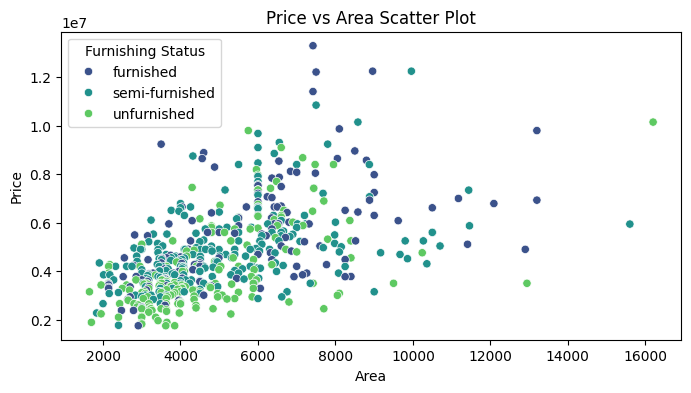

In [88]:
#plot Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=df,palette="viridis")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.show()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

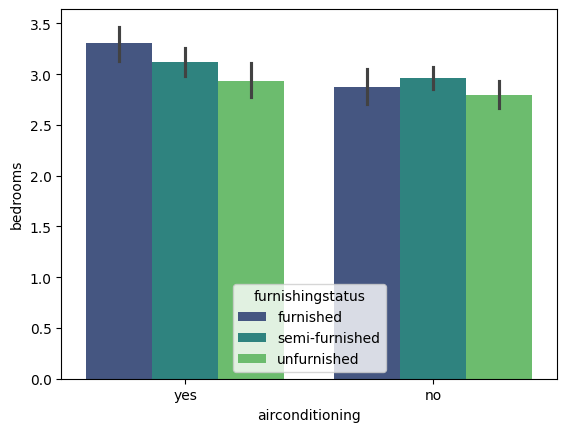

In [89]:
#Plot Bar Graph
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df['furnishingstatus'],palette="viridis")

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

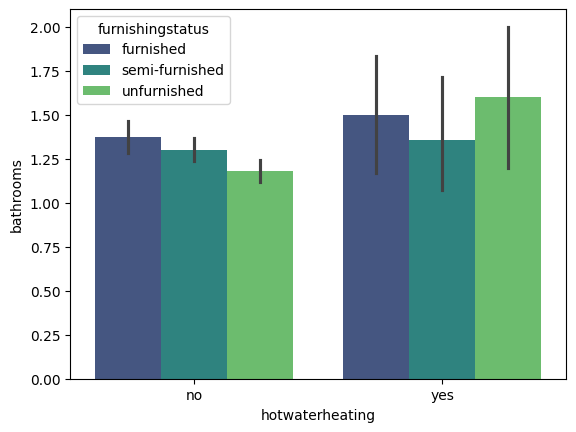

In [90]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"],palette="viridis")

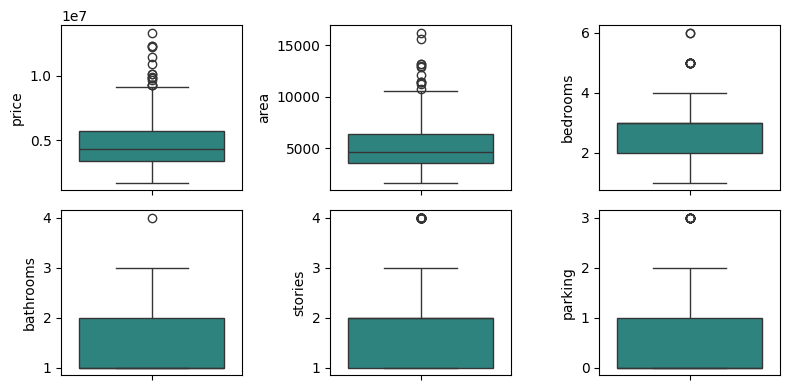

In [91]:
#plot Box Plot for feature
fig, axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(df['price'], ax = axs[0,0],palette='viridis')
plt2 = sns.boxplot(df['area'], ax = axs[0,1],palette='viridis')
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2],palette='viridis')
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0],palette='viridis')
plt2 = sns.boxplot(df['stories'], ax = axs[1,1],palette='viridis')
plt3 = sns.boxplot(df['parking'], ax = axs[1,2],palette='viridis')

plt.tight_layout()

<Axes: xlabel='bedrooms', ylabel='Density'>

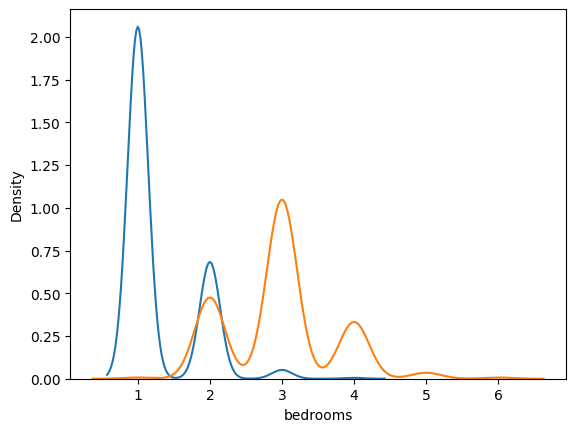

In [92]:
#Distplot
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

## Preprocessing

In [93]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [94]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [95]:
df['mainroad'].value_counts()

,count
mainroad,
yes,468
no,77


In [96]:
df['guestroom'].value_counts()

,count
guestroom,
no,448
yes,97


## Feature Engineering

In [97]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]=df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes':1,'no':0}).astype(int)

In [98]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [99]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [100]:
#Create dummy variable
df=pd.get_dummies(df,columns=['furnishingstatus'],drop_first='True')

In [101]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


### Model Creation

In [102]:
#Split data Train and Test
X = df.drop(['price'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Feature Scaling

In [103]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [66]:
model={
    'Linear Regression' : LinearRegression(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
}

In [67]:
pred={}
for name,model in model.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  pred[name]=y_pred

## Model Evaluation

In [76]:
acc={}
for name,y_pred in pred.items():
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  acc[name]=[mse,r2]

  print(f"Results for :  {name} " )
  print(f"Mean Squre Error :  {mse}")
  print(f"R2 Score : {r2}","\n")

Results for :  Linear Regression 
Mean Squre Error :  1523019469501.2913
R2 Score : 0.6463350878895877 

Results for :  Random Forest Regressor 
Mean Squre Error :  1847298709634.759
R2 Score : 0.5710332343954968 

Results for :  Gradient Boost Regressor 
Mean Squre Error :  1604564599715.6082
R2 Score : 0.6273992489933706 

Results for :  XGBoost 
Mean Squre Error :  2083551444992.0
R2 Score : 0.5161722898483276 

Results for :  Support Vector regressor 
Mean Squre Error :  4462190769765.794
R2 Score : -0.03617868189555318 

Results for :  Lasso Reg 
Mean Squre Error :  1523019381671.6501
R2 Score : 0.6463351082847717 

Results for :  Ridge Reg 
Mean Squre Error :  1507286141893.6584
R2 Score : 0.6499885710111001 



## Inference

*    Linear Reg showed **good performance** with an accuracy of 0.646335.
*   Random Forest Regressor achieved an accuracy of 0.571033, indicating moderate performance.
*   Gradient Boost Regressor performed relatively better with an accuracy of 0.627399.
*   XGBoost showed comparable performance with an accuracy of 0.516172.
*   Support Vector Regressor had a negative accuracy of -0.036178, indicating poor performance on the given regression problem.
*   Lasso Reg showed **good performance **with an accuracy of 0.646335.
*   Ridge Reg achieved a **best accuracy** of 0.649988, indicating its effectiveness in the regression task.







In [115]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['MSE', 'R2 Score'])
data

,MSE,R2 Score
Linear Regression,1.523019e+12,0.646335
Random Forest Regressor,1.847299e+12,0.571033
Gradient Boost Regressor,1.604565e+12,0.627399
XGBoost,2.083551e+12,0.516172
Support Vector regressor,4.462191e+12,-0.036179
Lasso Reg,1.523019e+12,0.646335
Ridge Reg,1.507286e+12,0.649989


<Axes: title={'center': 'R2 Score'}>

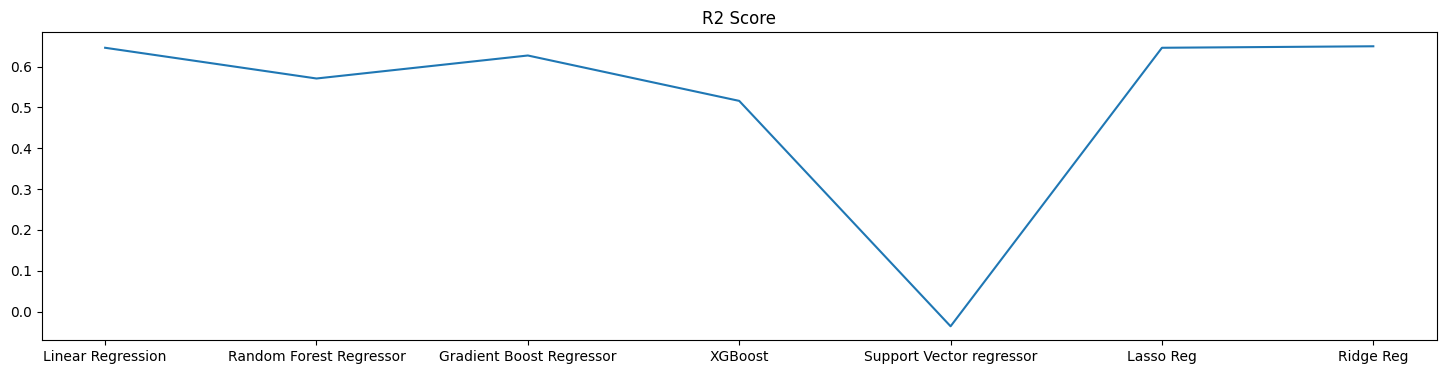

In [116]:
pic=data['R2 Score'].plot(kind='line', figsize=(18, 4), title='R2 Score')
pic